<a href="https://colab.research.google.com/github/FerrazThales/Health_Insurance_Cost_Prediction/blob/main/Health_Insurance_Cost_Prediction_with_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width="32%" src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true">

[Thales Ferraz | Data Scientist](https://thalesferraz.medium.com/)

> Visite também o meu artigo sobre esta análise no [Medium]()

Mais projetos do meu portfólio no [Github](https://bit.ly/3DQyZHu)

Vamos trocar mais idéias sobre Data Science no [LinkedIn](https://www.linkedin.com/in/thalesdefreitasferraz/)?

# O que você vai aprender nesta análise:

* O que é **seguro de vida**, como ele é calculado e a importância para seus familiares.
* O que é um algoritmo de **regressão** e algumas de suas **métricas** de validação.
* Como usar o **Pycaret**, um algoritmo de Auto Machine Learning (AutoML).

#Seguro de Vida - As seguradoras não se preocupam só com carros.

Dados da [Confederação Nacional de Seguros - CNSeg](https://revistasegurototal.com.br/2021/08/30/cnseg-debate-seguro-de-vida-com-especialistas-da-fenaprevi/) apontam que a modalidade de **seguro de vida** cresceu cerca de 10% entre 2016 e 2021. Isso representa um percentual duas vezes maior que a **média** dos outros tipos de seguros. Este crescimento esta relacionado a uma melhor **conscientização** da população sobre o tema e uma maior oferta deste produto pelas empresas.

Mas afinal, o que é **seguro de vida** e quando é importante fazer um? Neste [vídeo](https://www.youtube.com/watch?v=vmXF4fK4zq0) a Nath do canal **Me poupe!** explica mais detalhadamente este modelo de seguro e apresenta algumas companhias que oferem este tipo de produto. Em resumo, um seguro de vida tem como **objetivo** auxiliar financeiramente o segurado e a sua família a manter o mesmo *padrão de vida*, caso o segurado venha a **falecer** ou sofrer com doenças **graves**.

Ou seja, se um **cantor** perder a voz ele receberá o valor **contratado** em seu seguro de vida por conta deste [sinistro](https://www.mapfre.com.br/para-voce/seguro-vida/perguntas-frequentes/quem-e-o-sinistrado-no-seguro-de-vida/#:~:text=No%20seguro%20de%20vida%2C%20o,vida%20%C3%A9%20o%20pr%C3%B3prio%20segurado.&text=No%20caso%20de%20doen%C3%A7a%2C%20acidente,quem%20poder%C3%A1%20receber%20a%20indeniza%C3%A7%C3%A3o.). Se um autônomo ficar **incapacitado** de trabalhar por um tempo determinado, ele também receberá o valor que foi **contratado**. Até mesmo, se um pai **responsável** financeiramente por sua família vier a falecer (de COVID, por exemplo) a seguradora pagará a familia uma **indenização** que foi estipulada no contrato de **seguro de vida**.

<p align="center">
<img src="https://image.freepik.com/free-vector/illustration-family-life-insurance_53876-40781.jpg">
</p>

O seguro de vida traz **proteção** financeira e garante a família do segurado (e até ele mesmo) uma menor preocupação em momentos **delicados** e difíceis que podemos passar em nossas vidas.

Para o **cálculo** deste tipo de seguro, as seguradoras consideram o perfil do segurado e quais coberturas ele escolheu. Desta forma, o **valor** do seguro varia conforme as coberturas que foram **combinadas** na [apólice](https://mag.com.br/blog/educacao-financeira/artigo/o-que-e-apolice-de-seguro-de-vida). Para estipular os valores do seguro, são considerados alguns aspectos como: renda mensal, idade, histórico médico, profissão e atividades de lazer *(esportes radicais podem influenciar muito no valor do seguro)*.

Geralmente, as seguradoras usam uma [tábua biométrica]() e algumas **fórmulas** de estatística e probabilidade para **calcular** os valores em sua empresa. No entanto, ter um modelo que utiliza uma **inteligência artificial** que se adequa ao seu próprio banco de dados pode trazer grandes **vantagens competitivas** para o seu negócio.

Neste projeto, abordaremos uma possível **solução** que pode ser utilizada por uma companhia do **ramo de seguros** para calcular de forma *inteligente* os valores de suas apólices, sempre considerando as características **individuais** apresentadas por cada cliente.

# Obtenção dos Dados

Os dados utilizados neste **projeto** são baseados em uma base de dados disponibilizada no Kaggle: [Health Insurance Cost Prediction](https://www.kaggle.com/annetxu/health-insurance-cost-prediction). Existem **poucas** informações sobre a origem dos dados, como eles foram utilizados e o significado de cada variável. No entanto, a partir da **investigação** do modelo de negócio de seguros na internet foi possível realizar a **interpretação** das variáveis e prosseguir com a análise.

## Dicionário de Variáveis
* `age` : Idade.
* `sex` : Gênero.
* `bmi` : Índice de Massa Corporal, o [IMC](https://pt.wikipedia.org/wiki/%C3%8Dndice_de_massa_corporal).
* `children` : Quantidade de crianças que possui o segurado.
* `smoker` : Se o segurado é fumante ('yes' ou 'no').
* `region` : Região residencial em que mora o segurado.
* `charges` : Valor cobrado pela seguradora.

#Análise Exploratória dos Dados

Antes de partir para a **construção** de modelos de machine learning é importante saber como os dados estão se **comportando**. 

Há uma correlação forte entre as variáveis? Os dados estão balanceados? Temos uma quantidade razoável de elementos?. É isso que vamos buscar entender a partir de agora.   **;)**

In [107]:
#importando os módulos padrão que serão usados no projeto
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

#ignorar as warnings
import warnings
warnings.filterwarnings('ignore')

Para facilitar a reprodução deste dataset, coloquei os dados em meu próprio [Github](https://github.com/FerrazThales).

Aproveite e dê uma olhada em outros projetos de Data Science feitos por mim!

In [108]:
#endereço dos dados no github
endereco_dos_dados = "https://raw.githubusercontent.com/FerrazThales/Health_Insurance_Cost_Prediction/main/insurance.csv"

#lendo o arquivo em csv e guardando na variável df
df = pd.read_csv(endereco_dos_dados)

#exibindo as 5 primeiras entradas
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [109]:
#exibindo os valores de entrada e saída da base de dados
print('Esta base de dados possui:')
print('{:,} entradas'.format(df.shape[0]).replace(',','.'))
print('{} variáveis'.format(df.shape[1]))

Esta base de dados possui:
1.338 entradas
7 variáveis


In [110]:
#nome das colunas do dataset
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Saber com quais os **tipos de dados** estamos lidando é de suma importância. Variáveis categóricas precisam de um tratamento **diferente** do das variáveis númericas. Além disso, às vezes, alguns dados não vem em forma de data embora eles representem um período de tempo.

Neste dataset, todas as variáveis estão com seu tipo **adequado** ao que elas representam. Ou seja, a variável `age`, por exemplo, veio **corretamento** como número inteiro e não como texto. Ademais, as variáveis categóricas não apresentam valores distintos que representam a **mesma coisa**, tal como "*yes*" e "*y*".

In [111]:
#avaliando os tipos de valores do dataset
pd.DataFrame(df.dtypes,columns=['Tipo de Dados'])

Tipo de Dados
age              int64
sex             object
bmi            float64
children         int64
smoker          object
region          object
charges        float64

In [112]:
#Avaliando quais são os valores únicos de algumas variáveis
print('Valores únicos da variável sex: {}'.format(df.sex.unique()))
print('Valores únicos da variável smoker: {}'.format(df.smoker.unique()))
print('Valores únicos da variável region: {}'.format(df.region.unique()))

Valores únicos da variável sex: ['female' 'male']
Valores únicos da variável smoker: ['yes' 'no']
Valores únicos da variável region: ['southwest' 'southeast' 'northwest' 'northeast']


Dados do [Kaggle](https://www.kaggle.com/) geralmente vem bem tratados, sem valores **vazios**. No entanto, a ausência de valores vazios não correspondem a base de dados da **realidade**.

In [113]:
#Avaliando a quantiade de valores vazios
pd.DataFrame(df.isnull().sum(),columns=['Quantidade de Valores Vazios'])

Quantidade de Valores Vazios
age                                  0
sex                                  0
bmi                                  0
children                             0
smoker                               0
region                               0
charges                              0

Para um maior detalhamento das variáveis númericas, podemos chamar o método **describe** do pandas. Nele são apresentadas as principais **estatísticas descritivas** de nossa base de dados.

Neste exemplo, percebemos que o valor **médio** de um seguro gira em torno de 13 mil doláres, mas apresenta um alto **desvio padrão** de 12 mil doláres. Além disso, a maior parte de nossos dados, **cerca de 75%**, se encontra abaixo da faixa de 17 mil doláres.

In [114]:
df.describe().round(2)

age      bmi  children   charges
count  1338.00  1338.00   1338.00   1338.00
mean     39.21    30.66      1.09  13270.42
std      14.05     6.10      1.21  12110.01
min      18.00    15.96      0.00   1121.87
25%      27.00    26.30      0.00   4740.29
50%      39.00    30.40      1.00   9382.03
75%      51.00    34.69      2.00  16639.91
max      64.00    53.13      5.00  63770.43

In [115]:
#maior valor de seguro cobrado
print('Cliente com o maior valor de seguro cobrado:')
df[df.charges == df.charges.max()].round(2)

Cliente com o maior valor de seguro cobrado:


age     sex    bmi  children smoker     region   charges
543   54  female  47.41         0    yes  southeast  63770.43

Uma maneira interessante de avaliar como as variáveis se **comportam** em conjunto é através de uma **matriz de correlação**. Uma correlação de valor númerico 1 (**100%**) representa que existe uma grande *relação estatística* (associação) entre as variáveis. Ou seja, elas estão muito correlacionadas.

Já uma correlação próxima a 0 (**0%**), representa que as variáveis **não** possuem correlação significativa entre si. O aumento de uma **não** está relacionado ao aumento da outra.

Em nossa análise da base de dados, todas as correlações são consideradas como **fracas**, já que a maior correlação apresenta apenas 0.3 (30%).

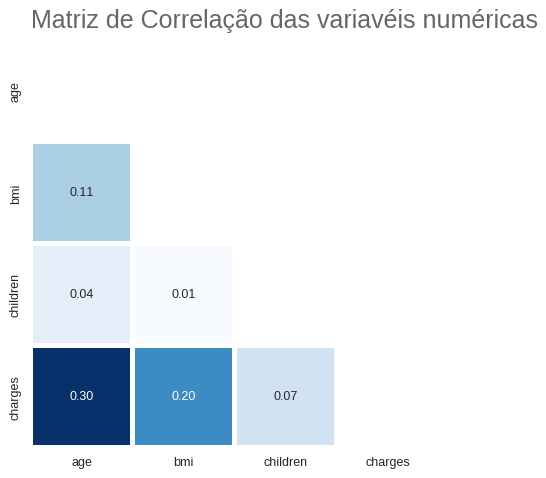

In [116]:
#calculando a matriz de correlação entre as variáveis
matriz_de_correlacao = df.corr()

#criando uma máscara para melhor visualização
mascara = np.zeros_like(matriz_de_correlacao)
mascara[np.triu_indices_from(mascara)] = True

#plotando a matriz de correlação usando seaborn
with sns.axes_style('white'):
  fig,ax = plt.subplots(figsize=(6,6),dpi=90)
  ax = sns.heatmap(matriz_de_correlacao,mask=mascara,square=True,cmap='Blues',annot=True,fmt='.2f',linewidths=3,cbar=False)
  ax.set_title('Matriz de Correlação das variavéis numéricas',loc='left',pad=10,fontdict={'fontsize':20},color='#666666')

Um histograma avalia como está a **frequência** de distribuição da variável escolhida. A realização deste gráfico é importante para visualizar se os valores da variável escolhida se encotram apenas em *determinadas* faixas ou se distribuem ao longo da **média**.

Nesta análise dos dados percebemos que há uma maior quantidade de clientes **jovens** e a companhia tem mais contratos dos planos de seguros de menor valor. Além disso, há uma parte **significativa** dos clientes estão na faixa em que são considerados **obsesos** (ibm > 30).

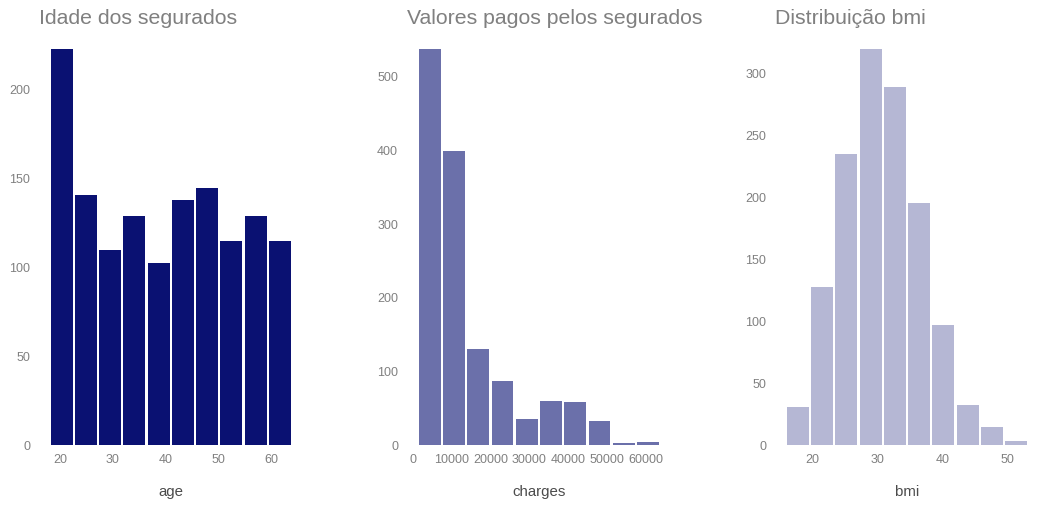

In [117]:
#criando o ax e o fig no matplotlib
fig,ax = plt.subplots(ncols=3,figsize=(12,6),dpi=90)

#criação do histograma para a idade
ax[0].hist('age',data=df,color='#0a1172',rwidth=0.9)
ax[0].set_frame_on(False)
ax[0].grid(lw=0.0)
ax[0].tick_params(axis='both',length=0,colors='grey')
ax[0].set_title('Idade dos segurados',loc='left',pad=5,fontdict={'fontsize':17},color='grey')
ax[0].set_xlabel('age',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')

#criação do histograma para valores pagos
ax[1].hist('charges',data=df,color='#0a1172',alpha=0.6,rwidth=0.9)
ax[1].set_frame_on(False)
ax[1].grid(lw=0.0)
ax[1].tick_params(axis='both',length=0,colors='grey')
ax[1].set_title('Valores pagos pelos segurados',loc='left',pad=5,fontdict={'fontsize':17},color='grey')
ax[1].set_xlabel('charges',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')

#criação do histograma para bmi
ax[2].hist('bmi',data=df,color='#0a1172',alpha=0.3,rwidth=0.9)
ax[2].set_frame_on(False)
ax[2].grid(lw=0.0)
ax[2].tick_params(axis='both',length=0,colors='grey')
ax[2].set_title('Distribuição bmi',loc='left',pad=5,fontdict={'fontsize':17},color='grey')
ax[2].set_xlabel('bmi',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')

#plotando o gráfico
plt.tight_layout(pad=2.0);

Intuitivamente, temos a creditar que pessoas que possuem alto **ibm** (IMC) e são **fumantes** tendem a ter uma expectativa de vida **menor**. Portanto, os valores de suas apólices de seguro tendem a ser **mais** altos.

No **gráfico de dispersão** abaixo, avaliamos como estas variáveis estão se comportando entre si. Os pontos **azuis** representam os clientes que são fumantes.

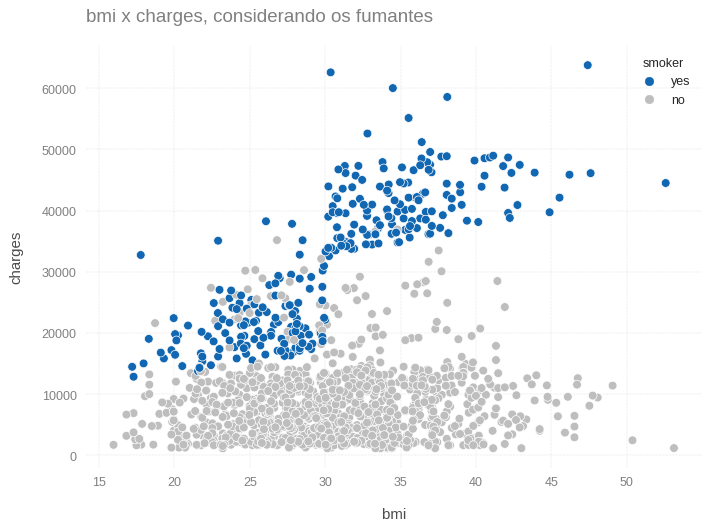

In [160]:
#criando o ax e o fig no matplotlib
fig,ax = plt.subplots(figsize=(8,6),dpi=90)

#construindo o scatter com seaborn
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker',ax=ax,palette=['#1167b1','#BEBEBE'])
ax.set_frame_on(False)
ax.grid(linestyle='-.',lw=0.25,aa=True)
ax.legend(loc='best',title='smoker',framealpha=0.8)
ax.tick_params(axis='both',length=0,colors='grey')
ax.set_title('bmi x charges, considerando os fumantes',loc='left',pad=20,fontdict={'fontsize':15},color='grey')
ax.set_xlabel('bmi',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')
ax.set_ylabel('charges',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')

#plotando o gráfico
plt.tight_layout();

Outra comparação interessante a se fazer é verificar quais dos genêros **pagam** mais pelas **apólices** dos seguros de vida. Pelos gráficos abaixo, podemos observar que o valor pago pelos homens tem a mesma **mediana** que o das mulheres. Entretanto, analisando os demais dados **conjuntamente** os clientes do sexo masculino tendem a pagar mais do que as clientes do gênero feminino. Isso pode estar relacionado a **expectativa de vida** dos homens que é mais baixa do que a das mulheres.

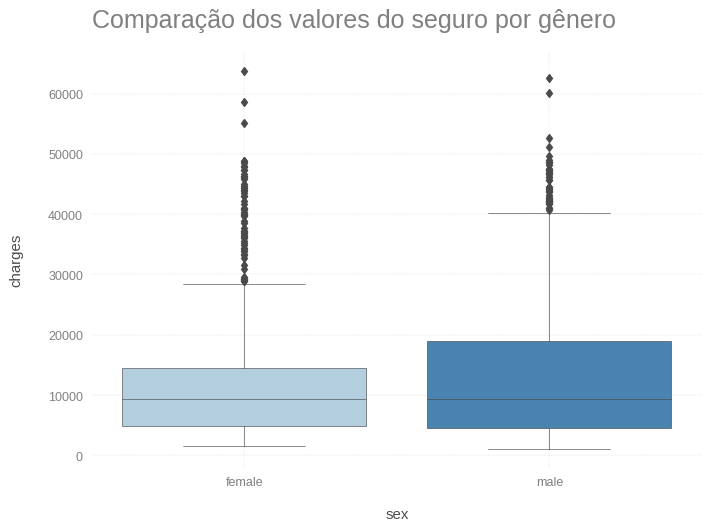

In [119]:
#criando o ax e o fig no matplotlib
fig,ax = plt.subplots(figsize=(8,6),dpi=90)

#criação do boxplot
sns.boxplot(data=df,x='sex',y='charges',ax=ax,palette='Blues',linewidth=0.5)
ax.grid(linestyle='--',lw=0.25,aa=True)
ax.set_frame_on(False)
ax.tick_params(axis='both',length=0,colors='grey')
ax.set_xlabel('sex',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')
ax.set_ylabel('charges',labelpad=20,fontdict={'fontsize':12},color='#4c4c4c')
ax.set_title('Comparação dos valores do seguro por gênero',loc='left',pad=20,fontdict={'fontsize':20},color='grey')

#plotando o gráfico
plt.tight_layout();

O seguro de vida também pode estar relacionado com o **local** onde os clientes moram. Algumas regiões tem **índices** de criminalidade e homicídios bem **maiores** que as outras, isto pode fazer com que as apólices dos seguros se torne mais **caras** para os clientes que residem nestas regiões.

Comentamos anteriormente que a base de dados **não** especifica muito bem a origem dos dados e seu uso. Consequentemente **não** é possível fazer uma análise mais **criteriosa** desta variável. Apenas conseguimos *constatar* que os moradores da região `southeast` são os que mais pagam no valor de seus seguros de vida.

In [120]:
#funcao feita para colocar o rotulo de dados
def addlabels(x,y):
  for i in range (len(x)):
    ax[1].text(i,y[i] + 100000,'R$ {:,}'.format(int(y[i])).replace(',','.'),ha='center',fontsize=16,color='grey')

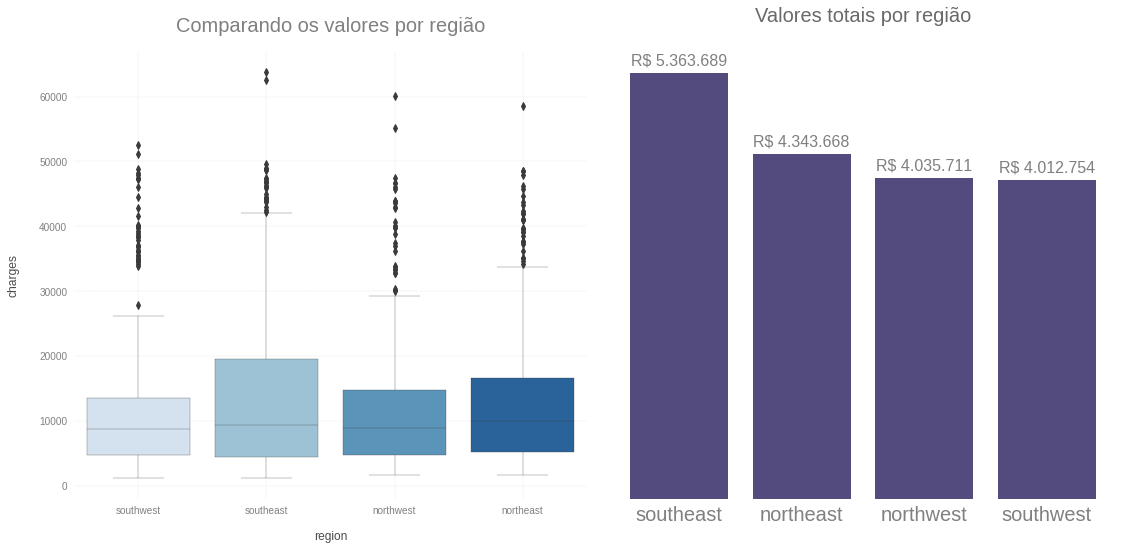

In [121]:
#criando o ax e o fig no matplotlib
fig,ax = plt.subplots(ncols=2,figsize=(16,8),dpi=72)

#boxplot comparando as regiões
sns.boxplot(data=df,x='region',y='charges',ax=ax[0],palette='Blues',linewidth=0.3)
ax[0].grid(linestyle='--',lw=0.25,aa=True)
ax[0].set_frame_on(False)
ax[0].tick_params(axis='both',length=0,colors='grey')
ax[0].set_xlabel('region',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')
ax[0].set_ylabel('charges',labelpad=20,fontdict={'fontsize':12},color='#4c4c4c')
ax[0].set_title('Comparando os valores por região',loc='center',pad=20,fontdict={'fontsize':20},color='grey')

#gráfico com os valores totais de cada região
dados_regioes = df.groupby(by='region').sum().sort_values(by='charges',ascending=False)
ax[1].bar(data=dados_regioes,x=dados_regioes.index,height='charges',color='#281e5d',alpha=0.8)
ax[1].set_title('Valores totais por região',loc='center',pad=30,fontdict={'fontsize':20},color='dimgrey')
ax[1].tick_params(axis='x',rotation=0,labelsize=20,labelcolor='grey',length=0)
ax[1].set_frame_on(False)
ax[1].get_yaxis().set_visible(False)
ax[1].grid(False)

#colocando os rótulos de dados
addlabels(dados_regioes.index,dados_regioes.charges)

#plotando os gráficos
plt.tight_layout(pad=2.0);

A partir de agora pretendemos **avaliar** os dados como um **todo**, principalmente a variável `charges`. Uma boa maneira de **visualizar** os valores e as *estatísticas descritiva*s é através do [Boxplot](https://www.voitto.com.br/blog/artigo/boxplot). Já utilizamos este gráfico em nossa análise antes, mas agora vale atentar a quantidade de **outliers** que nossa base de dados possui.

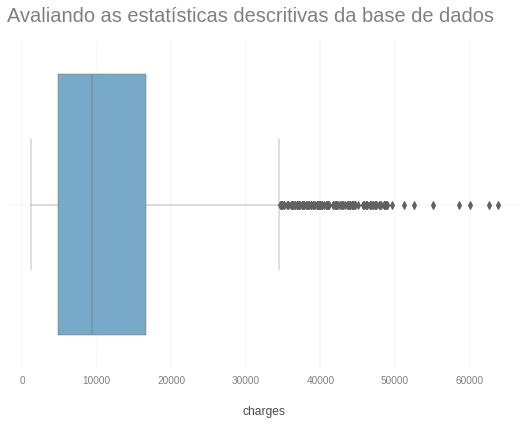

In [155]:
#criando o ax e o fig no matplotlib
fig,ax = plt.subplots(figsize=(8,6),dpi=72)

#criando o plot antes do tratamento
sns.boxplot(data=df,x='charges',ax=ax,palette='Blues',linewidth=0.4)
ax.grid(linestyle='--',lw=0.25,aa=True)
ax.set_frame_on(False)
ax.tick_params(axis='both',length=0,colors='grey')
ax.set_xlabel('charges',labelpad=20,fontdict={'fontsize':12},color='#4c4c4c')
ax.set_title('Avaliando as estatísticas descritivas da base de dados',loc='left',pad=20,fontdict={'fontsize':20},color='grey')

#plotando o gráfico
plt.tight_layout();

Para calcular a quantidade de **outliers** utilizamos o método [IQR - Method](https://online.stat.psu.edu/stat200/lesson/3/3.2#:~:text=Any%20observations%20that%20are%20more,above%20Q3%20are%20considered%20outliers.). Com este método calculamos a distância entre o *terceiro* e o *primeiro* quartil e estabelecemos os **limites** superior e inferior. Qualquer observação **acima** do limite superior é considerada um **outlier**, bem como qualquer valor **abaixo** do limite inferior também é considerado um **outlier**.

Em nossa análise, observamos que cerca de **11%** dos valores da base de dados podem ser considerados *outliers*. Além disso, esta porcentagem representa quase **33%** da receita da empresa. Portanto, não podemos retirar estes dados de nossa base já que podemos causar prejuízos para uma boa **aprendizagem** de nosso modelo de machine learning.

In [157]:
#Cálculo do IQR - intervalo interquartilico e limites
IQR = df.charges.quantile(0.75) - df.charges.quantile(0.25)
lim_sup = df.charges.quantile(0.75) + 1.5 * IQR
lim_inf = df.charges.quantile(0.25) - 1.5 * IQR

#Verificando porcentagem de valores que são outliers e sua receita
outliers_base_dados = df[(df.charges < lim_inf) | (df.charges > lim_sup)]
porcentagem_de_receita = outliers_base_dados.charges.sum()/df.charges.sum()
outliers = (df[(df.charges < lim_inf) | (df.charges > lim_sup)].shape[0]) / df.shape[0]

#Realizando o print dos resultados
print('Porcentagem de outliers {:.2f}%'.format(outliers*100))
print('Os outliers são responsáveis por {:.2f}% da receita da empresa'.format(porcentagem_de_receita*100))

Porcentagem de outliers 10.39%
Os outliers são responsáveis por 32.96% da receita da empresa


Outro fator importante a se analisar **antes** de construir modelos de machine learning é o *balanceamento dos dados*. Dados desbalanceados tendem a **favorecer** as classes **majoritárias** (os valores que aparecem mais vezes). Dependendo de nosso **objetivo** este favorecimento as classes majoritárias pode **enviesar** os algoritmos.

Por exemplo, nós queremos *descobrir* se uma pessoa tem uma doença **rara**. Naturalmente, por a doença ser rara, os pacientes que a possuem irão aparecer pouquíssimas vezes em nossa base de dados. Para *driblar* esta situação é necessário realizar um melhor **tratamento** dos dados. Caso esteja curioso de como fazer isso, visite um dos meus [projetos](https://thalesferraz.medium.com/detectando-fraudes-em-cart%C3%B5es-de-cr%C3%A9dito-com-intelig%C3%AAncia-artificial-6b196f3ef87d?p=6b196f3ef87d) em que me deparei com esta situação.

*Voltando* a nossa análise do banco de dados de *seguro de vida*, podemos constatar que os dados estão extremamente **balanceados** se formos considerar a variável **gênero**.

In [124]:
#funcao feita para colocar o rotulo de dados
def addlabels(x,y):
  for i in range (len(y)):
    ax.text(i,y[i] + 10,'{:,}'.format(int(y[i])).replace(',','.'),ha='center',fontsize=18,color='grey')

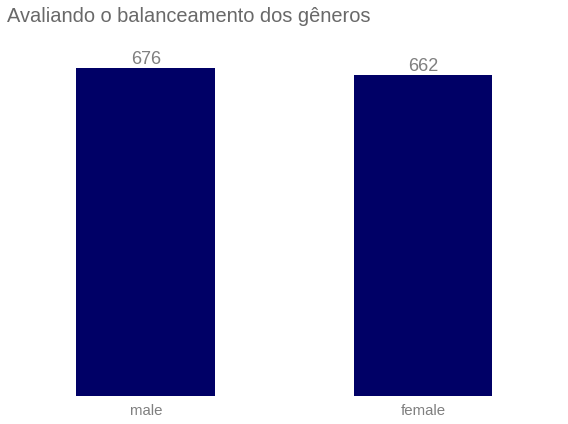

In [125]:
#criando o ax e o fig no matplotlib
fig,ax = plt.subplots(figsize=(8,6))

#criação do gráfico de colunas
df.sex.value_counts().plot.bar(ax=ax,color='#000066')
ax.get_yaxis().set_visible(False)
ax.grid(False)
ax.set_frame_on(False)
ax.tick_params(axis='x',rotation=0,labelsize=15,labelcolor='grey',length=0)
ax.set_title('Avaliando o balanceamento dos gêneros',loc='left',pad=30,fontdict={'fontsize':20},color='dimgrey')

#colocando os rótulos de dados
addlabels(df.sex,df.sex.value_counts())

#plotando o gráfico
plt.tight_layout();

# Criação dos Modelos de Machine Learning

Nosso **objetivo** principal é construir um **modelo** de *machine learning* que consiga **prever** com uma pequena taxa de erro quais valores devem ser **cobrados** pela seguradora na apólice de seguro de vida, considerando as características **individuais** dos seus clientes.

Podemos considerar este *problema* como do tipo **supervisionado**, uma vez que os valores pagos pelos clientes já estão presentes em nossa base de dados. Além disso, como queremos **prever** qual será o valor cobrado na apólice, devemos considerar a variável `charges` como nossa [variável alvo](http://lgmoneda.github.io/2019/01/15/ml-ds-common-problems.html#vari%C3%A1vel-alvo-target). Caso tenha dúvidas do que é um problema do tipo supervisionado, pesquise mais em: [Os Três Tipos de Aprendizado de Máquina](https://lamfo-unb.github.io/2017/07/27/tres-tipos-am/).

 pycaret, falar em separar dados de treino e teste

In [126]:
#separando 10% para teste
test = df.sample(frac=0.1)

#separando os dados de treino retirando os de teste
train=df.drop(test.index)

#resetar os index de ambos conjuntos de dados
test.reset_index(inplace=True,drop=True)
train.reset_index(inplace=True,drop=True)

In [127]:
#verificando os dados que foram separandos
print('Dados de treino : {}'.format(train.shape))
print('Dados de teste : {}'.format(test.shape))

Dados de treino : (1204, 7)
Dados de teste : (134, 7)


Neste projeto iremos utilizar o [PyCaret](https://pycaret.org/) uma ferramenta de AutoML. Por não ser nativo do Google Colab, é necessário realizar sua instalação e de outras bibliotecas apropriadas.

In [128]:
#instalando o pycaret no colab
!pip install pycaret -q 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [129]:
#instalar outra versão do scipy para ver os gráficos
!pip install scipy==1.2 --upgrade -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyod 0.9.5 requires scipy>=1.3.1, but you have scipy 1.2.0 which is incompatible.
phik 0.12.0 requires scipy>=1.5.2, but you have scipy 1.2.0 which is incompatible.
pandas-profiling 3.1.0 requires scipy>=1.4.1, but you have scipy 1.2.0 which is incompatible.
mlxtend 0.19.0 requires scipy>=1.2.1, but you have scipy 1.2.0 which is incompatible.
jax 0.2.21 requires scipy>=1.2.1, but you have scipy 1.2.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [130]:
#importando os módulos da biblioteca Pycaret (Auto Machine Learning)
from pycaret.regression import *

#configurando o colab para o pycaret
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


explicar o setup do pycaret

In [131]:
#criando o setup do pycaret, ele inicializa o ambiente de desenvolvimento e as pipelines
reg = setup(data = train,target='charges',normalize=True,
            normalize_method='zscore')

Description             Value
0                               session_id               420
1                                   Target           charges
2                            Original Data         (1204, 7)
3                           Missing Values             False
4                         Numeric Features                 2
5                     Categorical Features                 4
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set         (842, 14)
10                    Transformed Test Set         (362, 14)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              9516
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize              True
28                        Normalize Method            zscore
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

explicar o compare modelos

* falar das métricas

In [132]:
best = compare_models(sort='MAE',round=2)

Model      MAE          MSE     RMSE  \
gbr           Gradient Boosting Regressor  2570.33  22083752.97  4575.39   
et                  Extra Trees Regressor  2653.56  26769691.11  5095.52   
rf                Random Forest Regressor  2665.89  23263225.95  4732.41   
lightgbm  Light Gradient Boosting Machine  2770.88  23140171.29  4709.38   
dt                Decision Tree Regressor  2881.31  38670267.39  6169.09   
huber                     Huber Regressor  3211.72  45662901.25  6692.53   
par          Passive Aggressive Regressor  3532.87  48169134.08  6768.13   
ada                    AdaBoost Regressor  3985.92  26880303.78  5132.48   
llar         Lasso Least Angle Regression  4034.29  37536227.33  6038.89   
lasso                    Lasso Regression  4037.23  37575819.20  6041.70   
lr                      Linear Regression  4038.03  37589434.60  6042.86   
br                         Bayesian Ridge  4049.44  37567621.07  6040.67   
lar                Least Angle Regression  4049.53  37692949.91  6051.16   
ridge                    Ridge Regression  4054.04  37558877.60  6039.81   
knn                 K Neighbors Regressor  4957.30  66052308.60  7967.66   
omp           Orthogonal Matching Pursuit  5526.67  53305164.82  7259.42   
en                            Elastic Net  7170.56  91425129.20  9467.36   

            R2  RMSLE  MAPE  TT (Sec)  
gbr       0.84   0.43  0.30      0.08  
et        0.80   0.47  0.31      0.49  
rf        0.83   0.45  0.32      0.54  
lightgbm  0.83   0.48  0.34      0.09  
dt        0.71   0.49  0.30      0.02  
huber     0.66   0.44  0.20      0.04  
par       0.66   0.44  0.19      0.06  
ada       0.80   0.62  0.70      0.03  
llar      0.73   0.54  0.40      0.02  
lasso     0.73   0.54  0.40      0.02  
lr        0.73   0.54  0.40      0.27  
br        0.73   0.55  0.40      0.02  
lar       0.73   0.57  0.40      0.02  
ridge     0.73   0.56  0.40      0.02  
knn       0.53   0.59  0.49      0.06  
omp       0.61   0.74  0.89      0.02  
en        0.35   0.80  1.06      0.02

In [133]:
print('As características do melhor modelo são:\n')
print(best)

As características do melhor modelo são:

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=420, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


falar de escolher candidatos e instanciar alguns modelos

In [134]:
#instanciando o primeiro modelo
gbr = create_model('gbr',round=2)

MAE          MSE     RMSE    R2  RMSLE  MAPE
0     3103.03  29461228.63  5427.82  0.79   0.52  0.31
1     2342.06  19680396.31  4436.26  0.80   0.44  0.29
2     1972.83   9891258.43  3145.04  0.87   0.36  0.31
3     2329.47  20473383.05  4524.75  0.88   0.43  0.30
4     2385.48  13387676.80  3658.92  0.91   0.37  0.29
5     3280.31  36400757.37  6033.30  0.78   0.44  0.27
6     2066.46  12346580.32  3513.77  0.91   0.34  0.27
7     1959.10  11397801.63  3376.06  0.92   0.44  0.40
8     3272.94  36177395.11  6014.76  0.81   0.48  0.29
9     2991.61  31621052.06  5623.26  0.76   0.43  0.29
Mean  2570.33  22083752.97  4575.39  0.84   0.43  0.30
SD     508.70   9953113.84  1072.15  0.06   0.05  0.04

In [135]:
#instanciando o segundo modelo
lightgbm = create_model('rf',round=2)

MAE          MSE     RMSE    R2  RMSLE  MAPE
0     3023.58  30055470.75  5482.29  0.78   0.57  0.33
1     2894.30  25243603.78  5024.30  0.74   0.53  0.39
2     2199.70  12048283.23  3471.06  0.84   0.42  0.36
3     2480.14  20819784.40  4562.87  0.88   0.47  0.35
4     2367.02  14922707.34  3862.99  0.90   0.40  0.27
5     3430.54  37090864.71  6090.23  0.77   0.45  0.26
6     2024.21  13133930.21  3624.08  0.90   0.34  0.24
7     2121.62  14812934.25  3848.76  0.89   0.45  0.40
8     3072.46  32959276.02  5741.02  0.83   0.43  0.27
9     3045.35  31545404.79  5616.53  0.77   0.48  0.33
Mean  2665.89  23263225.95  4732.41  0.83   0.45  0.32
SD     460.79   8827160.43   931.40  0.06   0.06  0.05

falar que vem com os parâmetros padrão e precisamos tunar os modelos <- dar uma lida na documentação antes

In [136]:
#tunando o primeiro modelo -> gbr
tuned_gbr = tune_model(gbr,optimize='MAE',round=2)

MAE          MSE     RMSE    R2  RMSLE  MAPE
0     3500.61  30044655.23  5481.30  0.78   0.53  0.37
1     2993.11  23870613.96  4885.76  0.76   0.50  0.40
2     2187.98   9383717.24  3063.29  0.87   0.42  0.35
3     2842.22  24628255.42  4962.69  0.86   0.47  0.38
4     3131.50  19535133.06  4419.86  0.87   0.42  0.37
5     3419.20  35055333.85  5920.75  0.78   0.45  0.29
6     2077.88  11838353.68  3440.69  0.91   0.35  0.28
7     2192.69  13836678.52  3719.77  0.90   0.43  0.39
8     3754.86  37621991.37  6133.68  0.80   0.49  0.33
9     3318.23  32717088.92  5719.89  0.76   0.49  0.38
Mean  2941.83  23853182.12  4774.77  0.83   0.46  0.35
SD     571.60   9514567.49  1027.03  0.06   0.05  0.04

In [137]:
#avaliando os parâmetros escolhidos após o tuning no primeiro modelo
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=420, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [138]:
#tunando o segundo modelo -> lightgbm
tuned_lightgbm = tune_model(lightgbm,optimize='MAE',round=2)

MAE          MSE     RMSE    R2  RMSLE  MAPE
0     2450.91  31993078.26  5656.24  0.77   0.57  0.16
1     1859.10  19681030.21  4436.33  0.80   0.39  0.15
2     1083.10   6502561.24  2550.01  0.91   0.24  0.11
3     1925.13  19336543.57  4397.33  0.89   0.38  0.17
4     1807.74  15123266.33  3888.86  0.90   0.33  0.13
5     2573.04  36414160.56  6034.41  0.77   0.44  0.15
6     1381.19  11353021.68  3369.42  0.92   0.26  0.11
7     1012.27   8703442.69  2950.16  0.94   0.21  0.12
8     2647.34  37661468.69  6136.89  0.80   0.47  0.14
9     2461.25  32763153.22  5723.91  0.76   0.44  0.17
Mean  1920.11  21953172.65  4514.36  0.85   0.37  0.14
SD     579.77  11219728.42  1254.49  0.07   0.11  0.02

In [139]:
#avaliando os parâmetros escolhidos após o tuning no segundo modelo
print(tuned_lightgbm)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=5, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.002,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=420, verbose=0, warm_start=False)


### Primeiro Modelo -> Gradient Boosting Regressor

Este `plot` do PyCaret nos permite avaliar qual são as variáveis de maior importância para nosso modelo. Podemos observar que para o Gradient Boosting Regressor a variável que representa se o cliente é fumante é extremamente significativa para realizar as previsões.

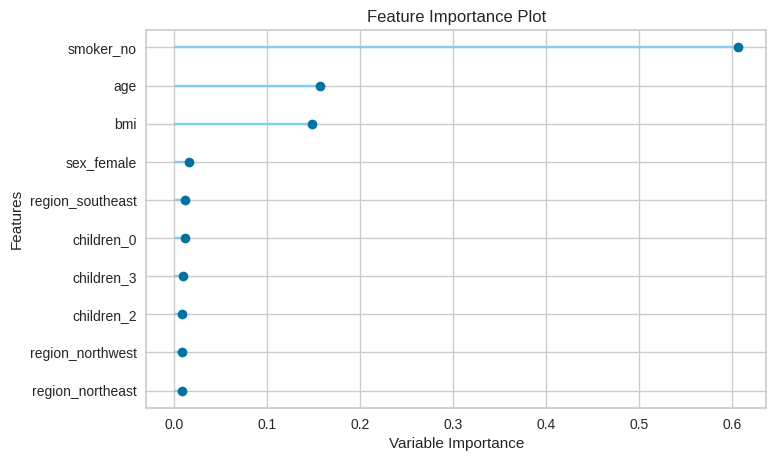

In [140]:
plot_model(tuned_gbr,plot='feature')

estudar sobre learning curve

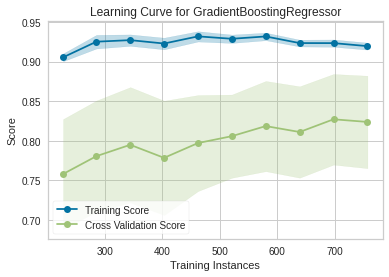

In [141]:
plot_model(tuned_gbr,plot='learning')

### Segundo Modelo -> Random Forest Regressor

Este plot do PyCaret nos permite avaliar qual a variável de maior importância para nosso modelo. Podemos observar que para o Gradient Boosting Regressor a variável que representa se o cliente é fumante é extremamente significativa para realizar as previsões.

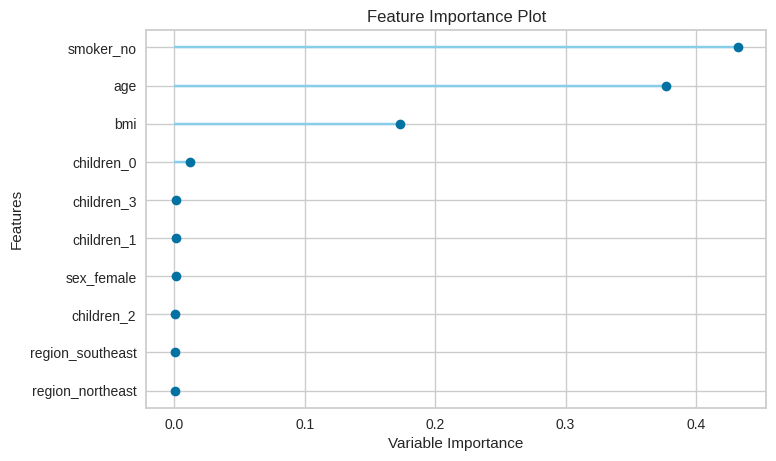

In [142]:
plot_model(tuned_lightgbm,plot='feature')

texto

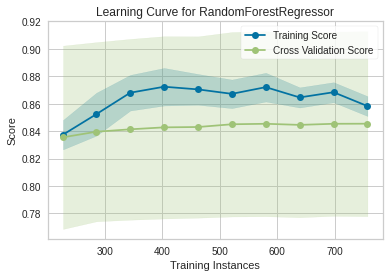

In [143]:
plot_model(tuned_lightgbm,plot='learning')

O [PyCaret](https://pycaret.org/) permite avaliar todos os gráficos que a biblioteca possui de forma interativa. Para acessar este método utilizamos o `evaluate_model`

In [144]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Fazendo a checagem final dos modelos

In [145]:
#fazendo previsões para o primeiro modelo <-ler o que rafael escreveu
predict_model(tuned_gbr);

Model        MAE           MSE  ...      R2   RMSLE    MAPE
0  Gradient Boosting Regressor  2801.2877  2.280863e+07  ...  0.8519  0.4476  0.2914

[1 rows x 7 columns]

In [146]:
#fazendo previsões para o segundo modelo <-ler o que rafael escreveu
predict_model(tuned_lightgbm);

Model        MAE           MSE  ...      R2   RMSLE    MAPE
0  Random Forest Regressor  1818.1221  1.958727e+07  ...  0.8728  0.3755  0.1271

[1 rows x 7 columns]

falar qual foi o melhor modelo e finalizar

In [147]:
#criando o modelo final que será utilizado na previsão
final_model = finalize_model(tuned_lightgbm)

#Previsão dos Custos de Seguro de Vida

falar de dados não vistos, falar da coluna label, falar das métricas, como calcular o erro?

fazer excel para ver melhor perfomance

In [148]:
#previsão de dados não vistos pelo modelo
unseen_predictions = predict_model(final_model,data=test)
unseen_predictions.head().round(2)

age     sex    bmi  children smoker     region   charges     Label
0   46    male  26.62         1     no  southeast   7742.11   8595.36
1   30    male  24.40         3    yes  southwest  18259.22  18907.14
2   60    male  25.74         0     no  southeast  12142.58  13178.37
3   50  female  27.83         3     no  southeast  19749.38   9950.46
4   45  female  25.18         2     no  northeast   9095.07   8522.50

comparação visual

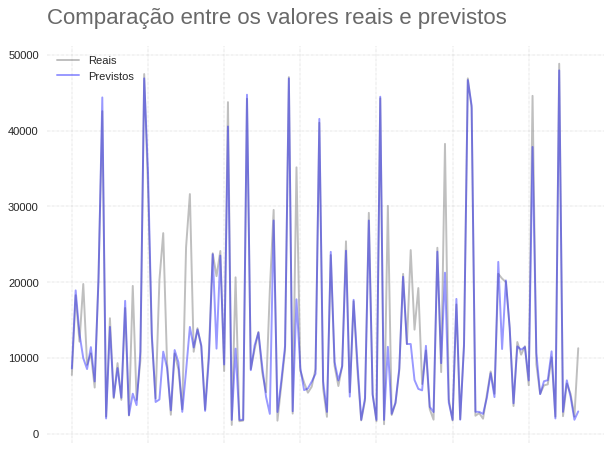

In [149]:
#criando o ax e o fig no matplotlib
fig,ax = plt.subplots(figsize=(8,6),dpi=80)

#construção do gráfico
unseen_predictions.charges.plot(color='grey',alpha=0.5,ax=ax)
unseen_predictions.Label.plot(color='blue',alpha=0.4,ax=ax);

#ajustes de layout
ax.set_frame_on(False)
ax.grid(linestyle='-.',lw=0.4,aa=True)
ax.legend(['Reais','Previstos'])
ax.set_title('Comparação entre os valores reais e previstos',loc='left',pad=20,fontdict={'fontsize':20},color='dimgrey')
ax.set_xticklabels([])
#colocar valores de y como dinheiro
#melhorar cor do gráfico


#plotando o gráfico
plt.tight_layout(pad=2.0);

comparações métricas

In [150]:
#calculando a diferença
unseen_predictions['difference (%)'] = abs(((unseen_predictions.Label - unseen_predictions.charges)/unseen_predictions.charges)*100)
unseen_predictions['absolute error'] = abs(unseen_predictions.Label - unseen_predictions.charges)
unseen_predictions.head().round(2)

age     sex    bmi  ...     Label difference (%) absolute error
0   46    male  26.62  ...   8595.36          11.02         853.25
1   30    male  24.40  ...  18907.14           3.55         647.93
2   60    male  25.74  ...  13178.37           8.53        1035.79
3   50  female  27.83  ...   9950.46          49.62        9798.93
4   45  female  25.18  ...   8522.50           6.30         572.57

[5 rows x 10 columns]

Avaliando a maior diferença percentual entre os valores corretos e nossas previsões

In [151]:
unseen_predictions[unseen_predictions['difference (%)'] == unseen_predictions['difference (%)'].max()].round(2)

age     sex   bmi  ...    Label difference (%) absolute error
52   24  female  27.6  ...  2608.04          86.24       16347.18

[1 rows x 10 columns]

Avaliando o maior erro absoluto de nossas previsões

In [152]:
unseen_predictions[unseen_predictions['absolute error'] == unseen_predictions['absolute error'].max()].round(2)

age   sex    bmi  ...     Label difference (%) absolute error
83   55  male  37.72  ...  11457.96          61.89       18605.62

[1 rows x 10 columns]

texto estatística principais

In [153]:
unseen_predictions[['difference (%)','absolute error']].describe().round(2)

difference (%)  absolute error
count          134.00          134.00
mean            15.38         2249.40
std             20.03         4516.42
min              0.01            1.02
25%              3.57          299.04
50%              7.75          574.30
75%             13.18          967.92
max             86.24        18605.62

#Conclusões

* isso
* aquilo
* etc